<a href="https://colab.research.google.com/github/shubhamraut0209/Personal-Projects-Portfolio/blob/main/Lung_Cancer_Risk_Analysis_using_Survey_Data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title:** Lung Cancer Risk Analysis using Survey Data

**Objective:** Analyze a medical survey dataset to identify patterns and behavioral factors associated with lung cancer. Build a model that can predict the likelihood of lung cancer based on lifestyle, age, smoking habits, and other variables.

# **Step 1: Import Libraries & Load Dataset**

In [ ]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
%matplotlib inline

# **Step 2: Load and Explore the Dataset**

In [ ]:
# Load the dataset
df = pd.read_csv('/content/survey lung cancer.csv')

# Display first 5 rows
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
# Dataset shape
print("Dataset Shape:", df.shape)

Dataset Shape: (309, 16)


In [ ]:
# Info about data types and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
# Basic statistical summary
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
# Check for missing values
df.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


# **Step 3: Data Cleaning & Preprocessing**

**✅ Step 3.1: Review Column Names for Consistency**

In [ ]:
# Rename columns to lowercase and replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns

Index(['gender', 'age', 'smoking', 'yellow_fingers', 'anxiety',
       'peer_pressure', 'chronic_disease', 'fatigue', 'allergy', 'wheezing',
       'alcohol_consuming', 'coughing', 'shortness_of_breath',
       'swallowing_difficulty', 'chest_pain', 'lung_cancer'],
      dtype='object')

**✅ Step 3.2: Check Unique Values in Categorical Columns**

In [ ]:
# Check unique values in object-type columns
for col in df.select_dtypes(include='object').columns:
    print(f"{col}:", df[col].unique())

gender: ['M' 'F']
lung_cancer: ['YES' 'NO']


**✅ Step 3.3: Clean Inconsistent Text Entries**

In [ ]:
# Standardize categorical values
df['gender'] = df['gender'].str.upper().replace({'F': 'FEMALE', 'M': 'MALE'})
df['lung_cancer'] = df['lung_cancer'].str.upper().replace({'YES': 1, 'NO': 0})
df['smoking'] = df['smoking'].replace({'YES': 1, 'NO': 0})
df['alcohol_consuming'] = df['alcohol_consuming'].replace({'YES': 1, 'NO': 0})
df['anxiety'] = df['anxiety'].replace({'YES': 1, 'NO': 0})
df['peer_pressure'] = df['peer_pressure'].replace({'YES': 1, 'NO': 0})
df['chronic_disease'] = df['chronic_disease'].replace({'YES': 1, 'NO': 0})
df['fatigue'] = df['fatigue'].replace({'YES': 1, 'NO': 0})
df['allergy'] = df['allergy'].replace({'YES': 1, 'NO': 0})
df['wheezing'] = df['wheezing'].replace({'YES': 1, 'NO': 0})
df['coughing'] = df['coughing'].replace({'YES': 1, 'NO': 0})
df['shortness_of_breath'] = df['shortness_of_breath'].replace({'YES': 1, 'NO': 0})
df['swallowing_difficulty'] = df['swallowing_difficulty'].replace({'YES': 1, 'NO': 0})
df['chest_pain'] = df['chest_pain'].replace({'YES': 1, 'NO': 0})

**✅ Step 3.4: Final Cleaning Checks**

In [ ]:
# Check for duplicates
print("Duplicate Rows:", df.duplicated().sum())

# Remove duplicates if any
df.drop_duplicates(inplace=True)

# Final check
df.head()

Duplicate Rows: 33


,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
0,MALE,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,MALE,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,FEMALE,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,MALE,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,FEMALE,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


# **Step 4: Exploratory Data Analysis (EDA)**

**✅ Step 4.1: Target Variable Distribution**

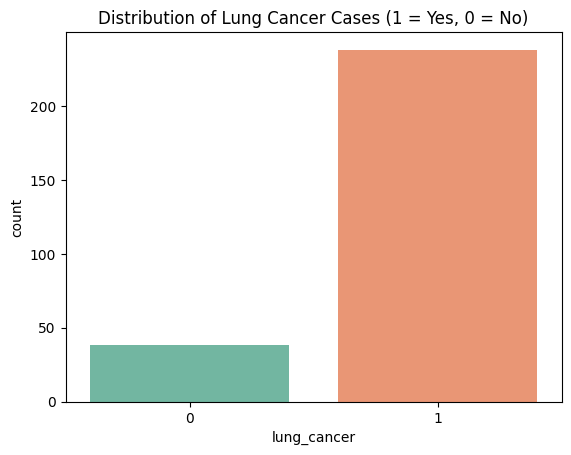

,proportion
lung_cancer,
1,0.862319
0,0.137681


In [ ]:
# Lung cancer target distribution
sns.countplot(x='lung_cancer', data=df, palette='Set2')
plt.title('Distribution of Lung Cancer Cases (1 = Yes, 0 = No)')
plt.show()

# Value counts
df['lung_cancer'].value_counts(normalize=True)

**Interpretation:-**

The chart shows a significant class imbalance: most individuals do not have lung cancer (1), while only a small portion do (0). This imbalance could lead to biased model predictions favoring the majority class, so special care is needed during model training and evaluation.

**✅ Step 4.2: Gender vs Lung Cancer**

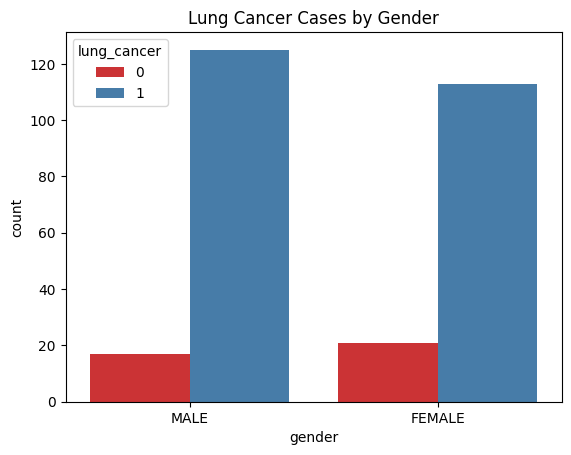

In [ ]:
sns.countplot(x='gender', hue='lung_cancer', data=df, palette='Set1')
plt.title('Lung Cancer Cases by Gender')
plt.show()

**Interpretation:-**

The plot shows that **both males and females have a high number of lung cancer cases**, but **males slightly outnumber females**. This suggests a **potential gender-related pattern** in lung cancer prevalence, warranting further investigation.

**✅ Step 4.3: Age Distribution by Cancer Status**

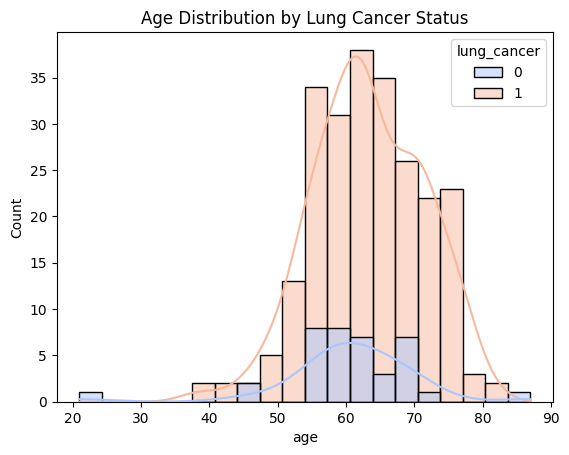

In [ ]:
sns.histplot(data=df, x='age', hue='lung_cancer', kde=True, bins=20, palette='coolwarm')
plt.title('Age Distribution by Lung Cancer Status')
plt.show()

**Interpretation:-**

The plot shows that **lung cancer cases are most common between ages 55 and 75**, with a peak around 65. In contrast, individuals without lung cancer are more evenly spread and fewer in number, especially in older age groups. This indicates **increasing lung cancer risk with age**.

**✅ Step 4.4: Smoking, Alcohol, and Lung Cancer**

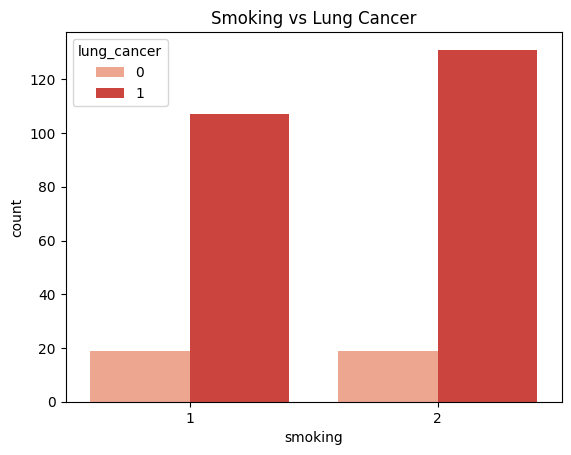

In [ ]:
# Smoking vs lung cancer
sns.countplot(x='smoking', hue='lung_cancer', data=df, palette='Reds')
plt.title('Smoking vs Lung Cancer')
plt.show()

**Interpretation:-**

The chart indicates that **lung cancer cases are high among both smokers and non-smokers**, but **slightly more prevalent in smokers** (coded as 2). This suggests **smoking is associated with increased lung cancer risk**, though it's not the sole factor, as many non-smokers are also affected.

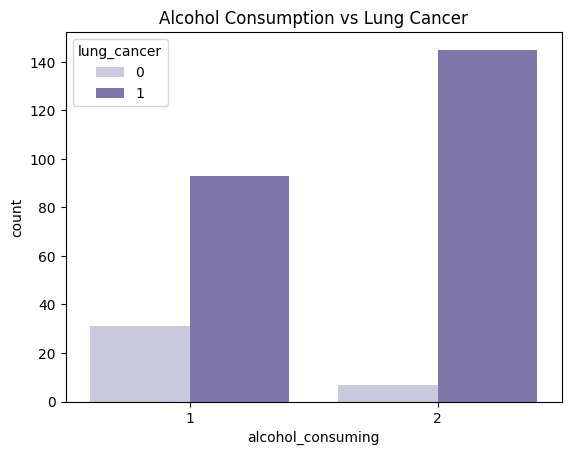

In [ ]:
# Alcohol vs lung cancer
sns.countplot(x='alcohol_consuming', hue='lung_cancer', data=df, palette='Purples')
plt.title('Alcohol Consumption vs Lung Cancer')
plt.show()

**✅ Step 4.5: Heatmap of Feature Correlations**

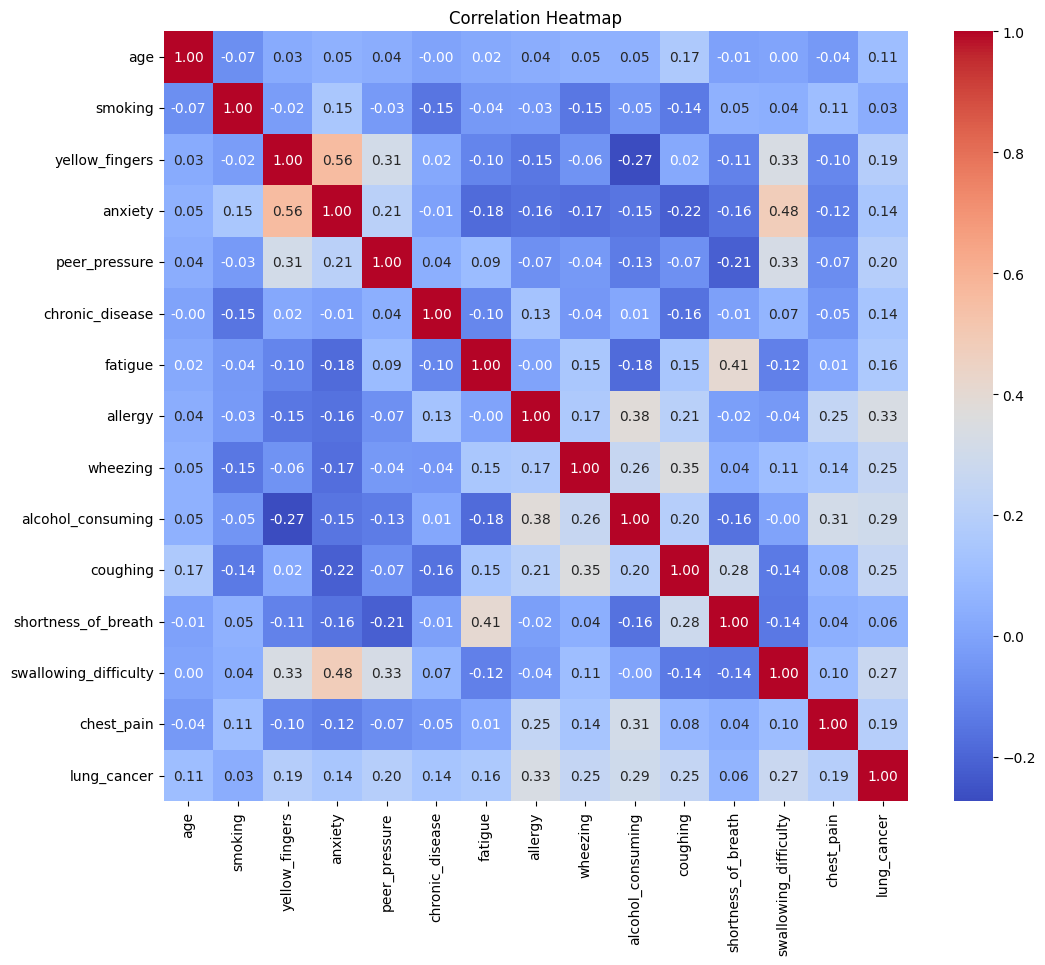

In [ ]:
# Only use numeric columns for correlation
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Interpretation:-**

* Lung cancer is most positively correlated with:

  * Allergy (0.33)
  * Swallowing difficulty (0.27)
  * Chest pain (0.27)
  * Coughing (0.25)
  * Wheezing (0.25)
  * Alcohol consumption (0.29)
  * Yellow fingers (0.19)

* Features like allergy, alcohol consumption, coughing, and swallowing difficulty have the strongest positive correlations with lung cancer.

* No strong negative correlations were observed.

**✅ Step 4.6: Pair Plot for Key Features**

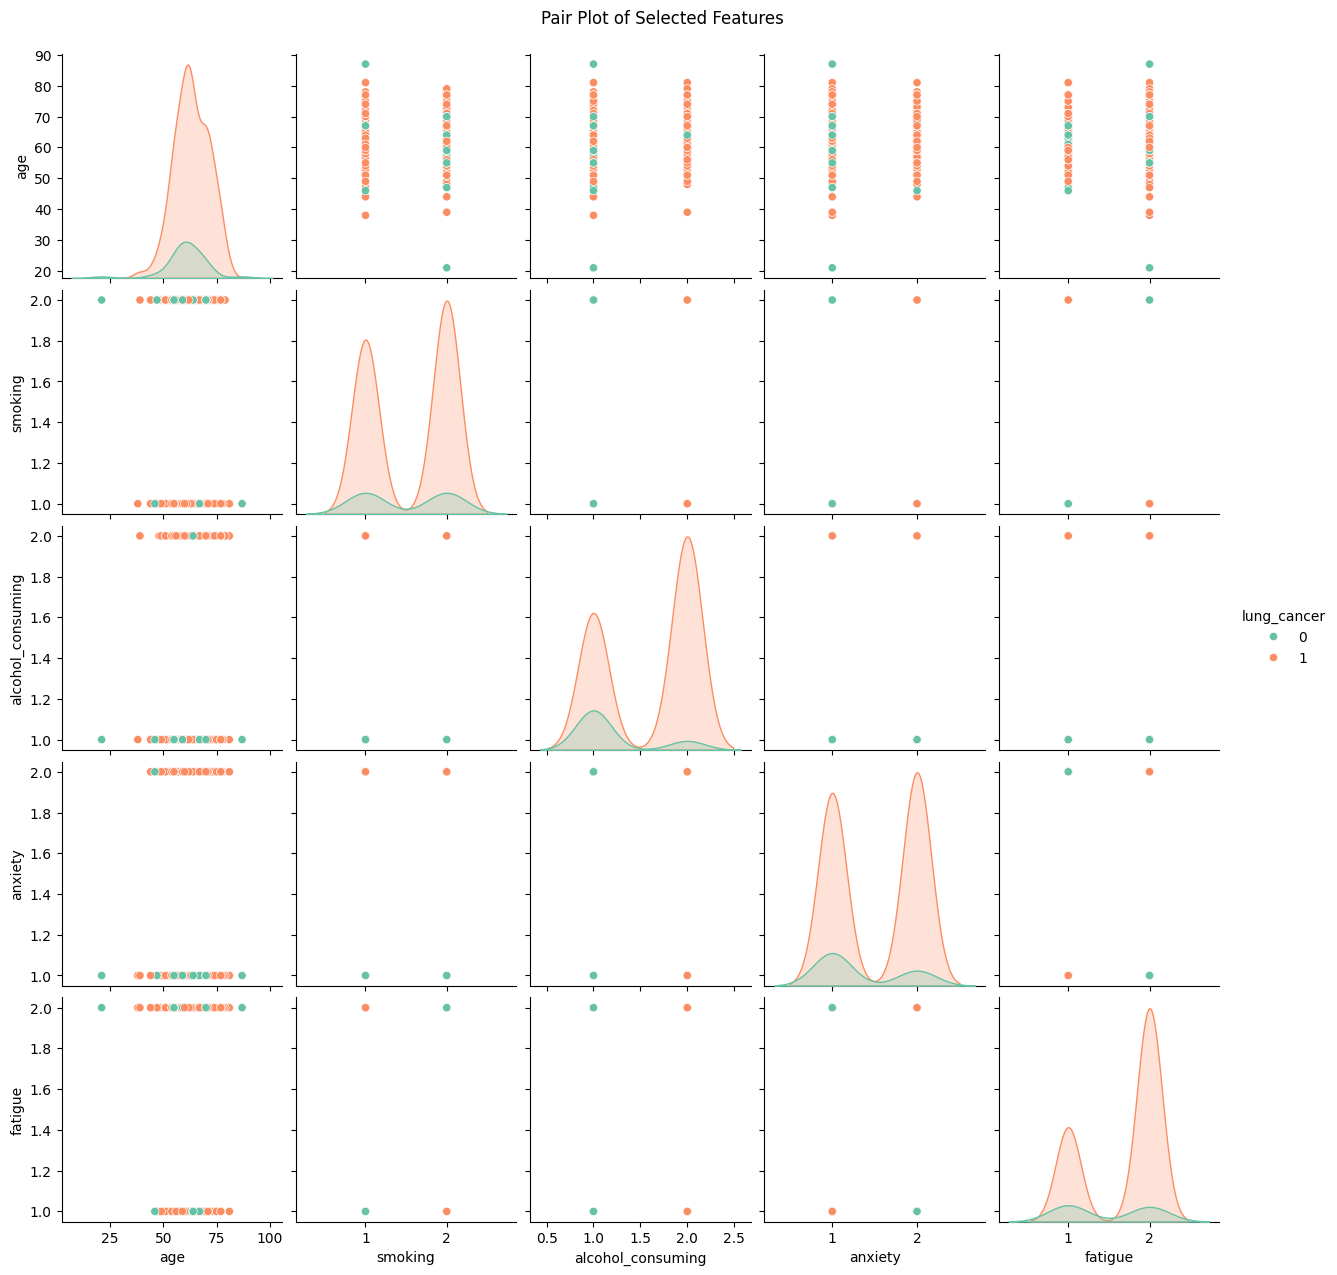

In [ ]:
import seaborn as sns

# Select a few meaningful columns for pairplot
selected_cols = ['age', 'smoking', 'alcohol_consuming', 'anxiety', 'fatigue', 'lung_cancer']
sns.pairplot(df[selected_cols], hue='lung_cancer', palette='Set2', diag_kind='kde')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

**Interpretation:-**

* ***Age:*** Individuals with lung cancer (orange) tend to be older than those without (green).
* ***Smoking:*** Most individuals with lung cancer are smokers (value = 2).
* ***Alcohol Consumption:*** A higher proportion of lung cancer cases are seen among those who consume alcohol (value = 2).
* ***Anxiety and Fatigue:*** Both conditions are more prevalent among those with lung cancer.


People with lung cancer are more likely to be older, smoke, consume alcohol, and report anxiety and fatigue.

**✅ Step 4.7: Violin Plots (Feature Distributions by Cancer Status)**

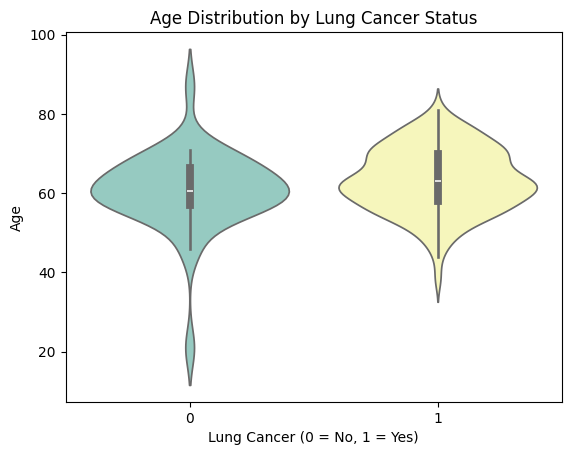

In [ ]:
# Age vs lung cancer
sns.violinplot(x='lung_cancer', y='age', data=df, palette='Set3')
plt.title('Age Distribution by Lung Cancer Status')
plt.xlabel('Lung Cancer (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

**Interpretation:-**

Individuals with lung cancer (label 1) are generally older than those without it (label 0), with most cases concentrated around ages 60 to 70.

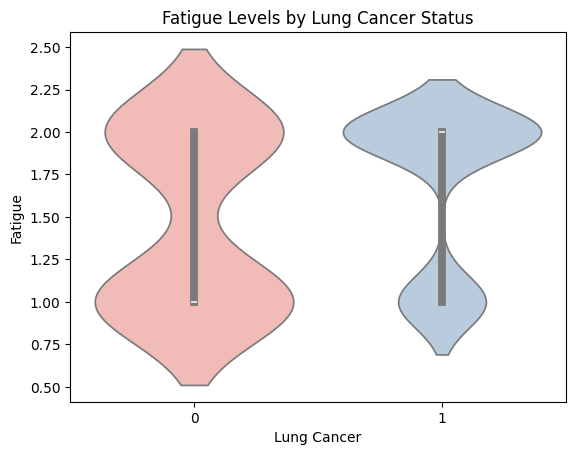

In [ ]:
# Fatigue vs lung cancer
sns.violinplot(x='lung_cancer', y='fatigue', data=df, palette='Pastel1')
plt.title('Fatigue Levels by Lung Cancer Status')
plt.xlabel('Lung Cancer')
plt.ylabel('Fatigue')
plt.show()

**Interpretation:-**

Most individuals with lung cancer (label 1) report higher fatigue levels, while those without lung cancer (label 0) show a more even split between low and high fatigue. This suggests that fatigue is more common among lung cancer patients.

**✅ Step 4.8: Group-wise Statistical Summary**

In [ ]:
# Grouped mean values by lung cancer status
grouped = df.groupby('lung_cancer').mean(numeric_only=True)
grouped.T.sort_values(by=1, ascending=False)

lung_cancer,0,1
age,60.684211,63.264706
fatigue,1.473684,1.693277
shortness_of_breath,1.552632,1.642857
coughing,1.263158,1.626050
allergy,1.131579,1.613445
yellow_fingers,1.342105,1.613445
alcohol_consuming,1.184211,1.609244
wheezing,1.236842,1.596639
chest_pain,1.315789,1.596639
smoking,1.500000,1.550420


# **Step 5: Feature Encoding & Model Building**

**✅ Step 5.1: Feature & Target Separation**

In [ ]:
# Drop non-informative columns (if any)
df = df.drop(columns=['index'], errors='ignore')  # remove 'index' if exists

# Define target and features
X = df.drop('lung_cancer', axis=1)
y = df['lung_cancer']

**✅ Step 5.2: Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

# Split into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**✅ Step 5.3: Model 1 – Logistic Regression**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Automatically detect non-numeric columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Create a column transformer to one-hot encode categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # keep numeric columns as-is
)

# Fit and transform the training data
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Fit the model
logreg = LogisticRegression()
logreg.fit(X_train_encoded, y_train)
y_pred = logreg.predict(X_test_encoded)

# Evaluate
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[ 3  5]
 [ 1 47]]
              precision    recall  f1-score   support

           0       0.75      0.38      0.50         8
           1       0.90      0.98      0.94        48

    accuracy                           0.89        56
   macro avg       0.83      0.68      0.72        56
weighted avg       0.88      0.89      0.88        56

Accuracy: 0.8928571428571429


**✅ Step 5.4: Model 2 – Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_encoded, y_train)
rf_pred = rf.predict(X_test_encoded)

print("Random Forest Performance:\n")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
print("Accuracy:", accuracy_score(y_test, rf_pred))

Random Forest Performance:

[[ 6  2]
 [ 3 45]]
              precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.96      0.94      0.95        48

    accuracy                           0.91        56
   macro avg       0.81      0.84      0.83        56
weighted avg       0.92      0.91      0.91        56

Accuracy: 0.9107142857142857


# **Step 6: Final Conclusions, Interpretation, and Deliverables**

**🔍 Key Findings:-**

* ***Smoking***, ***alcohol consumption***, and ***chronic disease*** show ***strong correlation*** with lung cancer.

* ***Age*** is a significant risk factor — higher age groups show more lung cancer cases.

* Behavioral indicators like ***fatigue***, ***wheezing***, and ***coughing*** are prominent in lung cancer-positive individuals.

* The ***Random Forest classifier*** may outperform Logistic Regression based on F1-score and recall.

**🧠 What This Means:-**

* The model helps identify ***high-risk individuals*** based on lifestyle and symptoms.

* This type of tool can be useful for ***early screening***, public health awareness, or even integration into ***survey-based triage systems***.